In [1]:
# Importing the Libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import random
from PIL import Image,ImageEnhance

#keras
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Dense,Flatten,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16
from sklearn.utils import shuffle

In [2]:
# Load the Dataset
# Directories for training and testing data
train_dir=r"D:\Mini Project\dataset\MRI_BrainTumor\Training"
test_dir=r"D:\Mini Project\dataset\MRI_BrainTumor\Testing"

# Loading and shuffeling Train data
train_paths=[]
train_labels=[]

for label in os.listdir(train_dir):
    for image in os.listdir(os.path.join(train_dir,label)):
        train_paths.append(os.path.join(train_dir,label,image))
        train_labels.append(label)

train_paths,train_labels=shuffle(train_paths,train_labels)
print("Train Dataset paths")
display(train_paths[0:10])


# Loading and shuffeling test data
test_paths=[]
test_labels=[]

for label in os.listdir(test_dir):
    for image in os.listdir(os.path.join(test_dir,label)):
        test_paths.append(os.path.join(test_dir,label,image))
        test_labels.append(label)

test_paths,test_labels=shuffle(test_paths,test_labels)
print("\nTest Dataset")
display(test_paths[0:10])

Train Dataset paths


['D:\\Mini Project\\dataset\\MRI_BrainTumor\\Training\\pituitary\\Tr-pi_1394.jpg',
 'D:\\Mini Project\\dataset\\MRI_BrainTumor\\Training\\notumor\\Tr-no_0412.jpg',
 'D:\\Mini Project\\dataset\\MRI_BrainTumor\\Training\\notumor\\Tr-no_1322.jpg',
 'D:\\Mini Project\\dataset\\MRI_BrainTumor\\Training\\pituitary\\Tr-pi_1131.jpg',
 'D:\\Mini Project\\dataset\\MRI_BrainTumor\\Training\\pituitary\\Tr-pi_1203.jpg',
 'D:\\Mini Project\\dataset\\MRI_BrainTumor\\Training\\glioma\\Tr-gl_1279.jpg',
 'D:\\Mini Project\\dataset\\MRI_BrainTumor\\Training\\pituitary\\Tr-pi_0533.jpg',
 'D:\\Mini Project\\dataset\\MRI_BrainTumor\\Training\\glioma\\Tr-gl_0767.jpg',
 'D:\\Mini Project\\dataset\\MRI_BrainTumor\\Training\\pituitary\\Tr-pi_0163.jpg',
 'D:\\Mini Project\\dataset\\MRI_BrainTumor\\Training\\meningioma\\Tr-me_1093.jpg']


Test Dataset


['D:\\Mini Project\\dataset\\MRI_BrainTumor\\Testing\\notumor\\Te-no_0304.jpg',
 'D:\\Mini Project\\dataset\\MRI_BrainTumor\\Testing\\notumor\\Te-no_0164.jpg',
 'D:\\Mini Project\\dataset\\MRI_BrainTumor\\Testing\\notumor\\Te-no_0315.jpg',
 'D:\\Mini Project\\dataset\\MRI_BrainTumor\\Testing\\pituitary\\Te-pi_0100.jpg',
 'D:\\Mini Project\\dataset\\MRI_BrainTumor\\Testing\\meningioma\\Te-me_0113.jpg',
 'D:\\Mini Project\\dataset\\MRI_BrainTumor\\Testing\\glioma\\Te-gl_0087.jpg',
 'D:\\Mini Project\\dataset\\MRI_BrainTumor\\Testing\\notumor\\Te-no_0038.jpg',
 'D:\\Mini Project\\dataset\\MRI_BrainTumor\\Testing\\pituitary\\Te-pi_0261.jpg',
 'D:\\Mini Project\\dataset\\MRI_BrainTumor\\Testing\\pituitary\\Te-pi_0149.jpg',
 'D:\\Mini Project\\dataset\\MRI_BrainTumor\\Testing\\pituitary\\Te-pi_0297.jpg']

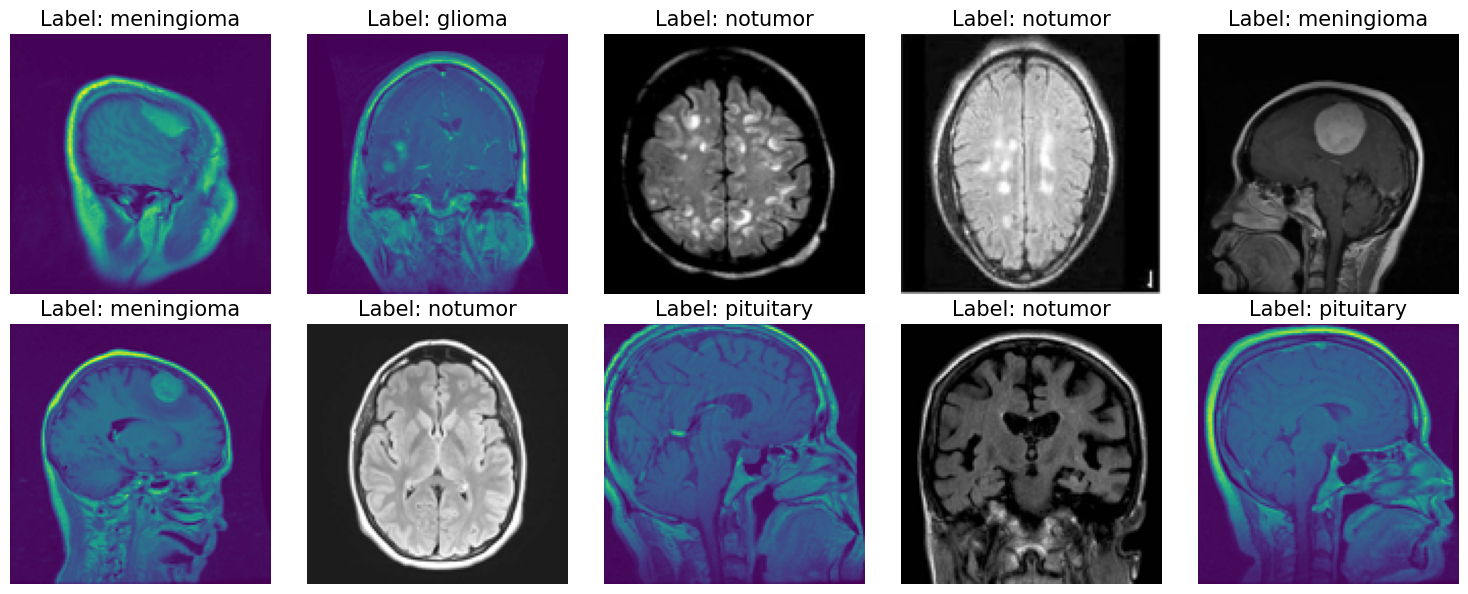

In [3]:
# Data Vizualization
# SElecting random Indeices for 10 images

random_indices=random.sample(range(len(train_paths)),10)

# Creating an image to display images in row
fig,axes=plt.subplots(2,5,figsize=(15,6))

axes=axes.ravel()

for i,idx in enumerate(random_indices):
    img_path=train_paths[idx]
    img = Image.open(img_path)
    img=img.resize((128,128))

    axes[i].imshow(img)
    axes[i].axis('off')
    axes[i].set_title(f"Label: {train_labels[idx]}",fontsize=15)

plt.tight_layout()
plt.show()

In [4]:
# Image Processing

# Image augmentation function
from tensorflow.keras.preprocessing.image import img_to_array
# Image pre-processing
def augmented_image(image):
    image = Image.fromarray(np.uint8(image))
    image = ImageEnhance.Brightness(image).enhance(random.uniform(0.8,1.2))
    image = ImageEnhance.Contrast(image).enhance(random.uniform(0.8,1.2))
    image = np.array(image)/255.0

    return image

def open_images(paths, augment=False):
    images=[]
    for path in paths:
        img = load_img(path, target_size=(128,128))
        img = img_to_array(img) / 255.0
        if augment:
            img = augmented_image(img)
        images.append(img)
    return np.array(images)


# Encoder labels [notumor, glioma, menigioma, pituitary ]
# Convertion form 0 to 4 unique labels
def encode_label(labels):
    unique_labels = sorted(os.listdir(train_dir))
    encoded = [unique_labels.index(label) for label in labels]  
    return encoded

# Data Generation For Batching
# Data Generation For Batching
def data_gen(paths, labels, batch_size=12):
    while True:  # Infinite loop to avoid "ran out of data" error
        paths, labels = shuffle(paths, labels)  # Shuffle every epoch
        for i in range(0, len(paths), batch_size):
            batch_paths = paths[i:i+batch_size]
            batch_images = open_images(batch_paths)
            batch_labels = labels[i:i+len(batch_paths)]
            batch_labels = encode_label(batch_labels)
            yield np.array(batch_images), np.array(batch_labels)

Epoch 1/5
285/285 ━━━━━━━━━━━━━━━━━━━━ 528s 2s/step - loss: 0.6183 - sparse_categorical_accuracy: 0.7556 - val_loss: 0.3066 - val_sparse_categorical_accuracy: 0.8685
Epoch 2/5
285/285 ━━━━━━━━━━━━━━━━━━━━ 489s 2s/step - loss: 0.2171 - sparse_categorical_accuracy: 0.9203 - val_loss: 0.2151 - val_sparse_categorical_accuracy: 0.9218
Epoch 3/5
285/285 ━━━━━━━━━━━━━━━━━━━━ 482s 2s/step - loss: 0.1657 - sparse_categorical_accuracy: 0.9419 - val_loss: 0.1295 - val_sparse_categorical_accuracy: 0.9473
Epoch 4/5
285/285 ━━━━━━━━━━━━━━━━━━━━ 448s 2s/step - loss: 0.1150 - sparse_categorical_accuracy: 0.9609 - val_loss: 0.1298 - val_sparse_categorical_accuracy: 0.9512
Epoch 5/5
285/285 ━━━━━━━━━━━━━━━━━━━━ 457s 2s/step - loss: 0.0650 - sparse_categorical_accuracy: 0.9745 - val_loss: 0.0766 - val_sparse_categorical_accuracy: 0.9737


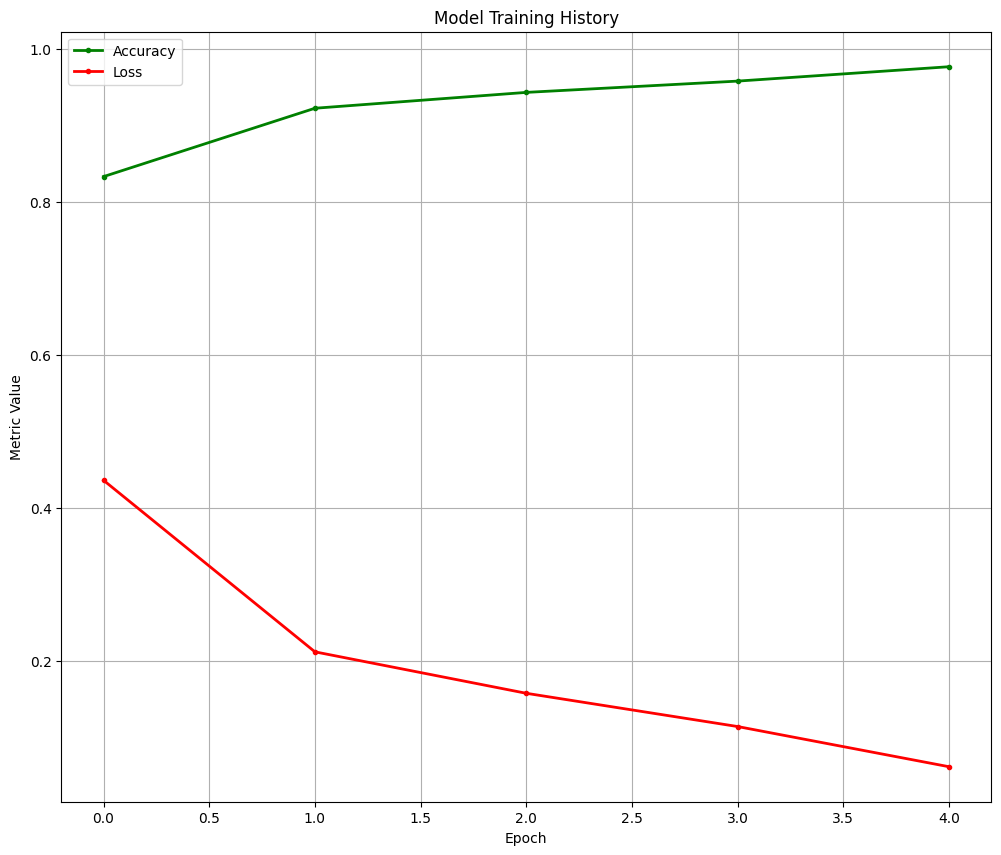

In [5]:
# Model
# Model Architecture
IMAGE_SIZE=128
base_model=VGG16(input_shape=(IMAGE_SIZE,IMAGE_SIZE,3), include_top=False)

# Freeze all the layers of VGG16
for layer in base_model.layers:
    layer.trainable = False


# Set only the last few layers
base_model.layers[-2].trainable=True
base_model.layers[-3].trainable=True
base_model.layers[-4].trainable=True

# Build model
model = Sequential()
model.add(Input(shape=(IMAGE_SIZE,IMAGE_SIZE,3)))
model.add(base_model)

# Search on Transfer learning

model.add(Flatten())
model.add(Dropout(0.3))

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(len(os.listdir(train_dir)),activation='softmax'))

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='sparse_categorical_crossentropy',
    metrics=['sparse_categorical_accuracy']
)

batch_size = 20 # should set it to 20
epochs = 5
steps = len(train_paths) // batch_size


history = model.fit(
    data_gen(train_paths, train_labels, batch_size=batch_size),
    steps_per_epoch=len(train_paths) // batch_size,
    epochs=epochs,
    validation_data=data_gen(test_paths, test_labels, batch_size=batch_size),
    validation_steps=len(test_paths) // batch_size
)


# Train And Val Plots
plt.figure(figsize=(12,10))
plt.grid(True)

# Plot 1: Accuracy
plt.plot(history.history['sparse_categorical_accuracy'],'.-g',label='Accuracy',linewidth=2)

# Plot 2: Loss
plt.plot(history.history['loss'],'.-r',label='Loss',linewidth=2)
plt.xlabel('Epoch') 
plt.ylabel('Metric Value')
plt.title('Model Training History')
plt.legend()
plt.show()

In [6]:
# Classfication Report
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import label_binarize
import numpy as np

test_images = open_images(test_paths)
test_labels_encoded=encode_label(test_labels)

test_predictions = model.predict(test_images)
print("Classification Report: ")
print(classification_report(test_labels_encoded,np.argmax(test_predictions,axis=1)))

41/41 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step
Classification Report: 
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       300
           1       0.93      0.97      0.95       306
           2       1.00      0.99      0.99       405
           3       0.99      0.99      0.99       300

    accuracy                           0.97      1311
   macro avg       0.97      0.97      0.97      1311
weighted avg       0.97      0.97      0.97      1311



Confusion Matrix: 


array([[281,  18,   0,   1],
       [  4, 298,   2,   2],
       [  3,   1, 401,   0],
       [  0,   3,   0, 297]], dtype=int64)

<Axes: >

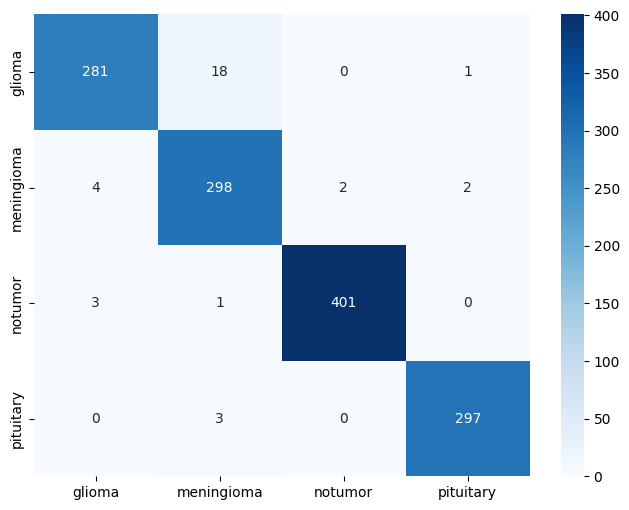

In [7]:
# Confusion Matrix
conf_matrix=confusion_matrix(test_labels_encoded,np.argmax(test_predictions,axis=1))
print("Confusion Matrix: ")
display(conf_matrix)

plt.figure(figsize=(8,6))
sorted_labels = sorted(os.listdir(train_dir))
sns.heatmap(conf_matrix, annot=True, fmt='d',
            xticklabels=sorted_labels,
            yticklabels=sorted_labels,
            cmap="Blues")

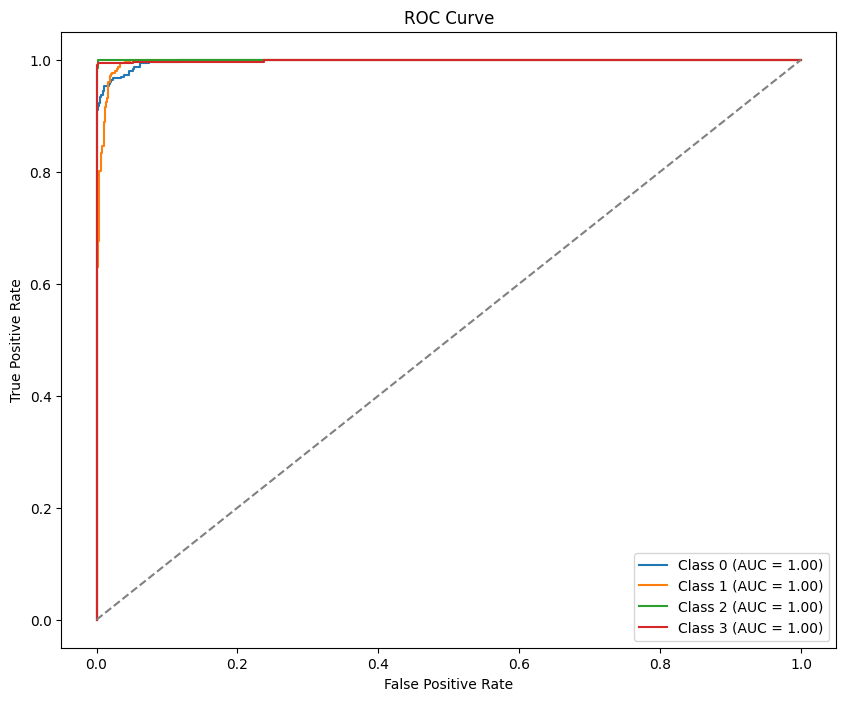

In [8]:
# ROC Curve
tests_labels_bin=label_binarize(test_labels_encoded,classes=np.arange(len(os.listdir(train_dir))))
test_predictions_bins=test_predictions

# Computing ROC Curve for all Classes
fpr,tpr,roc_auc={},{},{}
for i in range(len(os.listdir(train_dir))):
    fpr[i],tpr[i],_=roc_curve(tests_labels_bin[:,i],test_predictions_bins[:,i])
    roc_auc[i]=auc(fpr[i],tpr[i])

# Plot ROC Curve
plt.figure(figsize=(10,8))
for i in range(len(os.listdir(train_dir))):
    plt.plot(fpr[i],tpr[i],label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0,1],[0,1],linestyle='--',color='gray')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='lower right')
plt.show()

In [11]:
# Saving the model
model.save('classification_model.keras')

In [10]:
model.save("classification_model.h5")

In [1]:
from tensorflow.keras.models import load_model
model=load_model('classification_model.h5')

In [17]:
# MRI Detection
from tensorflow.keras.utils import load_img, img_to_array

class_labels = sorted(os.listdir(train_dir))


def detect_and_display(image_path,model):
    try:
        IMAGE_SIZE=128
        # Load Image
        img=load_img(image_path,target_size=(IMAGE_SIZE,IMAGE_SIZE))
        img_array=img_to_array(img)/255.0
        img_array=np.expand_dims(img_array,axis=0)

        # Prediction
        predictions=model.predict(img_array)
        predicted_class_index=np.argmax(predictions,axis=1)[0]
        confidence_score=np.max(predictions,axis=1)[0]

        # Determine the class
        if class_labels[predicted_class_index]=='notumor':
            result = " NO Tumor Detected"
        else:
            result = f"Tumor: {class_labels[predicted_class_index]}"
        plt.imshow(load_img(image_path))        
        plt.axis('off')
        plt.title(f"{result} (Confidence: {confidence_score * 100:.2f}%)")
        plt.show()
        
    except Exception as e: 
        print("Error processing the image",str(e))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


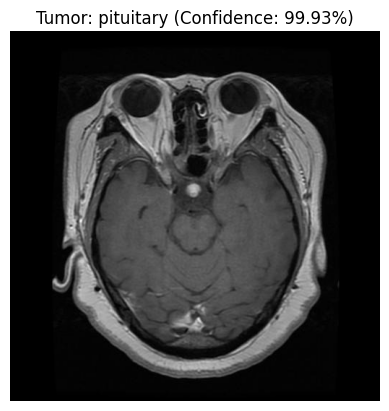

In [19]:
# Test
image_path='D:\Mini Project\dataset\MRI_BrainTumor\Testing\pituitary\Te-pi_0010.jpg'
detect_and_display(image_path,model)